In [1]:
import pandas as pd
import numpy as np


In [3]:
data=pd.read_csv('C:\\Users\Dell\Desktop\\play_prediction_weather.csv')

In [4]:
data

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
Outlook=LabelEncoder()
Temperature=LabelEncoder()
Humidity=LabelEncoder()
Wind=LabelEncoder()
Play=LabelEncoder()

In [7]:
data['Outlook']=Outlook.fit_transform(data['Outlook'])
data['Temperature']=Temperature.fit_transform(data['Temperature'])
data['Humidity']=Humidity.fit_transform(data['Humidity'])
data['Wind']=Wind.fit_transform(data['Wind'])
data['Play']=Outlook.fit_transform(data['Play'])


In [8]:
data

,Outlook,Temperature,Humidity,Wind,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [10]:
X=data[['Outlook','Temperature','Humidity','Wind']]

In [11]:
X

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [13]:
y=data['Play']


In [14]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
X_train

,Outlook,Temperature,Humidity,Wind
3,1,2,0,1
1,2,1,0,0
5,1,0,1,0
4,1,0,1,1
0,2,1,0,1
10,2,2,1,0
6,0,0,1,0
13,1,2,0,0
11,0,2,0,0
8,2,0,1,1


In [22]:
X_test

,Outlook,Temperature,Humidity,Wind
2,0,1,0,1
7,2,2,0,1
9,1,2,1,1


In [23]:
y_train

3     1
1     0
5     0
4     1
0     0
10    1
6     1
13    0
11    1
8     1
12    1
Name: Play, dtype: int64

In [24]:
y_test

2    1
7    0
9    1
Name: Play, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
classifier=DecisionTreeClassifier(criterion='entropy')
#classifier=DecisionTreeClassifier(criterion='gini')

In [34]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
classifier.predict(X_test)

array([1, 0, 1])

In [36]:
X_test  # 0 means no and 1 means yes

,Outlook,Temperature,Humidity,Wind
2,0,1,0,1
7,2,2,0,1
9,1,2,1,1


In [37]:
classifier.score(X_test,y_test)

1.0

In [41]:
from sklearn import tree

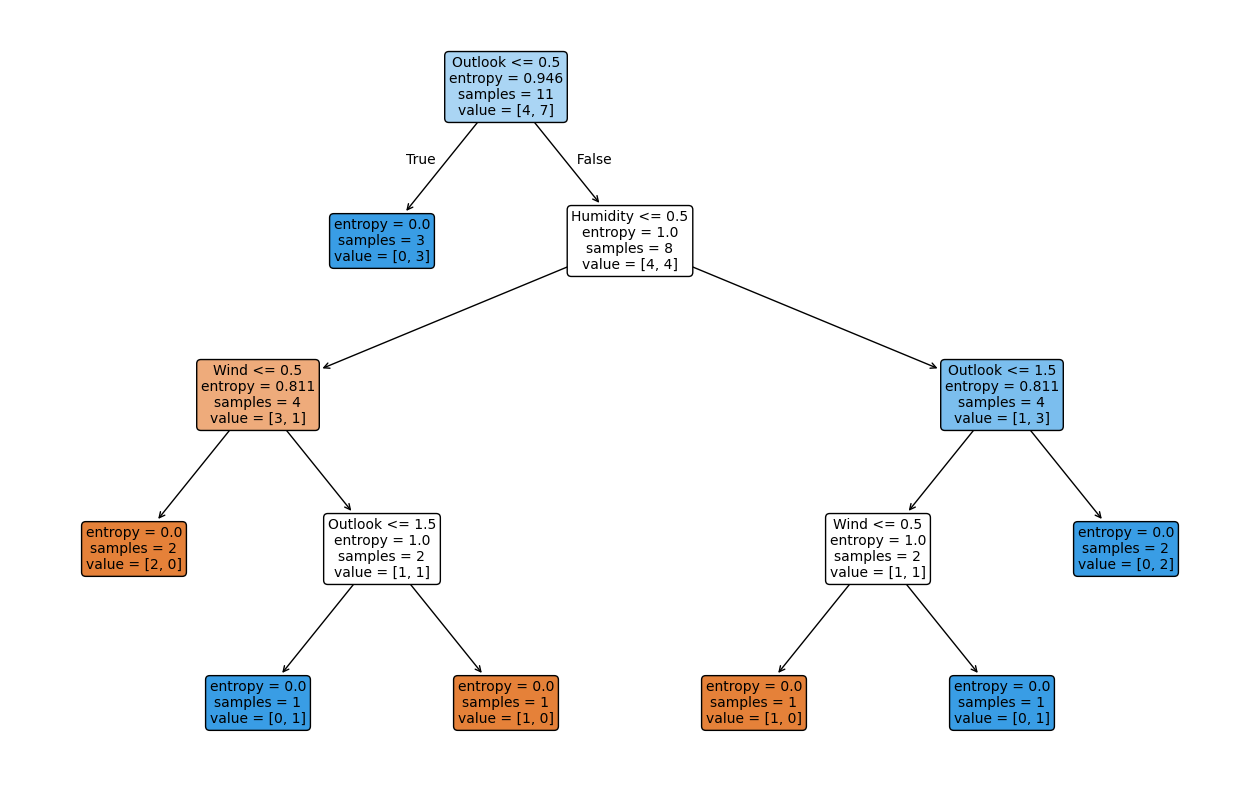

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
tree.plot_tree(
    classifier,
    feature_names=X.columns,
    #class_names=["Died", "Survived"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
